In [414]:
import pandas as pd
from keras import Sequential, Input, Model
from keras.activations import relu
from keras.layers import Dense,Dropout
from keras import utils
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from keras.callbacks import EarlyStopping
import datetime

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing  import MinMaxScaler, StandardScaler, RobustScaler, normalize

In [415]:
tf.random.set_seed(123)
np.random.seed(123)

In [416]:
def load_data(path_db: str) -> pd.DataFrame:
    df = pd.read_csv(path_db, delimiter=";", na_values="n/d")
    df["FECHA"] = pd.to_datetime(df["FECHA"], format="%d/%m/%y")
    df.set_index("FECHA", inplace=True)
    df.dropna(inplace=True)
    return df

In [417]:
def build_mlp_model(numero_inputs: int,numero_de_neuronas_capa_oculta: int,function_activation: str,uso_bias: bool, num_hidden_layers:int=2):
    
    input_layer = Input(shape=(numero_inputs,), name= "capa_entrada")
    x = Dense(units=numero_de_neuronas_capa_oculta,
                                    activation=function_activation,
                                    name="capa_oculta_1",
                                    use_bias=uso_bias)(input_layer)
    x = Dropout(rate=0.1)(x)

    for hidlayer in range (num_hidden_layers-1):

        x = Dense(units=numero_de_neuronas_capa_oculta,
                                        activation=function_activation,
                                        name="capa_oculta{}".format(hidlayer+1),
                                        use_bias=uso_bias)(x)
        x= Dropout(rate=0.1)(x)
    output_layer = Dense(units=numero_outputs, name="capa_salida")(x)

    model = Model(inputs=input_layer, outputs=output_layer)
   
    return model

In [418]:
df_adra = load_data("adra.csv")

In [419]:
#Temperatura, radiacion, velocidad del viento
df_input_output = df_adra[[ "Al10TMed", 'Al10Rad',  "Al10VelViento", "Al10ETo"]]

# VER SIMULACION DE MONTECARLO (buscar info)

ejemplo
list_df_train = []

In [420]:
df_train, df_val = train_test_split(df_input_output, train_size=0.8, random_state=123)  

In [421]:
arr_train_inputs = df_train.to_numpy()[:,:-1]
arr_train_outputs = df_train.to_numpy()[:,-1]
arr_val_inputs = df_train.to_numpy()[:,:-1]
arr_val_outputs = df_train.to_numpy()[:,-1]

In [422]:
# TODO Ojo que hay que guardar el scalador
mi_scaler = StandardScaler()
mi_scaler.fit(arr_train_inputs)

StandardScaler()

In [423]:
arr_train_inputs_scaled = mi_scaler.transform(arr_train_inputs)
arr_val_inputs_scaled = mi_scaler.transform(arr_val_inputs)

In [424]:
numero_inputs = arr_train_inputs.shape[1]
numero_outputs = 1

In [425]:
arr_train_inputs

array([[23.4, 17. ,  0.9],
       [14.5,  2.7,  2.6],
       [15.5, 10.5,  2.3],
       ...,
       [25. , 29. ,  1.1],
       [13.5, 15.6,  1.3],
       [12.5,  6.1,  1.1]])

In [426]:
arr_train_inputs.shape[1]

3

# mirar tensorboard en tensorflow dentro de los callback

In [427]:
# decisiones en el proceso de modelado. Hiperparametros
numero_de_neuronas_capa_oculta= 60
function_activation="relu"
uso_bias = True
funcion_entrenamiento ="adam"
loss_funcion= "mse"
list_metrics = ["mae","mape"]
batch_size = 10000
numero_de_epocas = 50

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_entrada (InputLayer)       │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_1 (Dense)           │ (None, 60)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta1 (Dense)            │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,961 (15.47 KB)

 Trainable params: 3,961 (15.47 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.7709 - mae: 3.3276 - mape: 95.5947 - val_loss: 13.5177 - val_mae: 3.2856 - val_mape: 93.8335
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 13.4228 - mae: 3.2738 - mape: 93.4837 - val_loss: 13.1635 - val_mae: 3.2302 - val_mape: 91.6602
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.0833 - mae: 3.2183 - mape: 91.2407 - val_loss: 12.8125 - val_mae: 3.1742 - val_mape: 89.4694
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.7271 - mae: 3.1629 - mape: 89.1504 - val_loss: 12.4648 - val_mae: 3.1177 - val_mape: 87.2751
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.3857 - mae: 3.1077 - mape: 87.0658 - val_loss: 12.1196 - val_mae: 3.0606 - val_mape: 85.0763
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 12.0531 - mae: 3.0514 - mape: 84.8588 - val_loss: 11.7766 - val_mae: 3.0031 - val_mape: 82.8850
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 11.7087 - mae: 2.9949 - map

<function matplotlib.pyplot.show(close=None, block=None)>

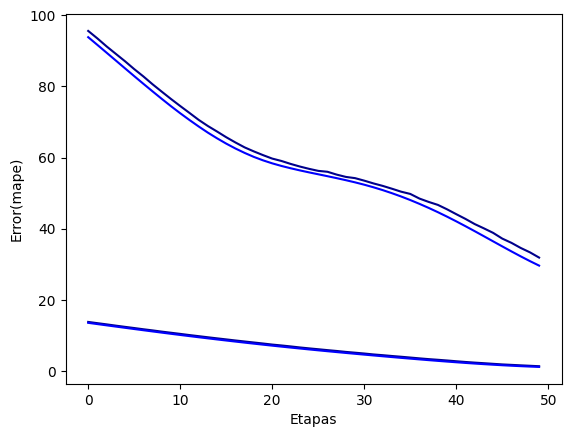

In [428]:
#Model
model = build_mlp_model(numero_inputs=numero_inputs,
                        numero_de_neuronas_capa_oculta=numero_de_neuronas_capa_oculta,
                        function_activation=function_activation,
                        uso_bias=uso_bias,
)      
model.summary()

model.compile(optimizer=funcion_entrenamiento,
              loss=loss_funcion,
              metrics=list_metrics)


early_Stopping = EarlyStopping(monitor="val_loss", patience=10)
early_Stopping2 = EarlyStopping(monitor="val_mae", patience=30)

history_object =model.fit(
                    arr_train_inputs_scaled,
                    arr_train_outputs,
                    batch_size=batch_size,
                    validation_data=(arr_val_inputs_scaled, arr_val_outputs),
                    epochs=numero_de_epocas,
                    callbacks=[early_Stopping, early_Stopping2]

)

dict_resultado_historico = history_object.history

x_values = history_object.epoch
y_entrenamiento = dict_resultado_historico["loss"]
y_validacion = dict_resultado_historico["val_loss"]

plt.plot(x_values, y_entrenamiento, label="Entrenamiento", c="darkblue")
plt.plot(x_values, y_validacion, label="validación" ,c="blue")

plt.xlabel("Etapas")
plt.ylabel("Error(loss)")
plt.legend
plt.show


y_entrenamiento_mape = dict_resultado_historico["mape"]
y_validacion_mape = dict_resultado_historico["val_mape"]
plt.plot(x_values, y_entrenamiento_mape, label="Entrenamiento", c="darkblue")
plt.plot(x_values, y_validacion_mape, label="validación" ,c="blue")

plt.xlabel("Etapas")
plt.ylabel("Error(mape)")
plt.legend
plt.show